# ROC and AUC

Case for a sample composed of two classes, to make the discussion easier. For samples with more classes you can plot the ROC curves for each class.

Source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [1]:
# Set up imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Use `make_classification` to generate a random dataset. From `sklearn` reference manual:

`This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative-dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data.`

You can play with the different arguments:

* Set `n_classes` to 2 so we get a binary problem __(if you want to change this you will have to adapt the notebook)__
* Set the value of `class_sep` to lower or higher values to make the task of the classifier harder or easier. Will affect the shape of the ROC.
* `n_samples` gives the number of objects generated
* Changing the number of features will also affect the behaviour of the classifier and thus the ROC

Suggestion: vary `class_sep` from 0.1 to 2 and see how the ROC changes.

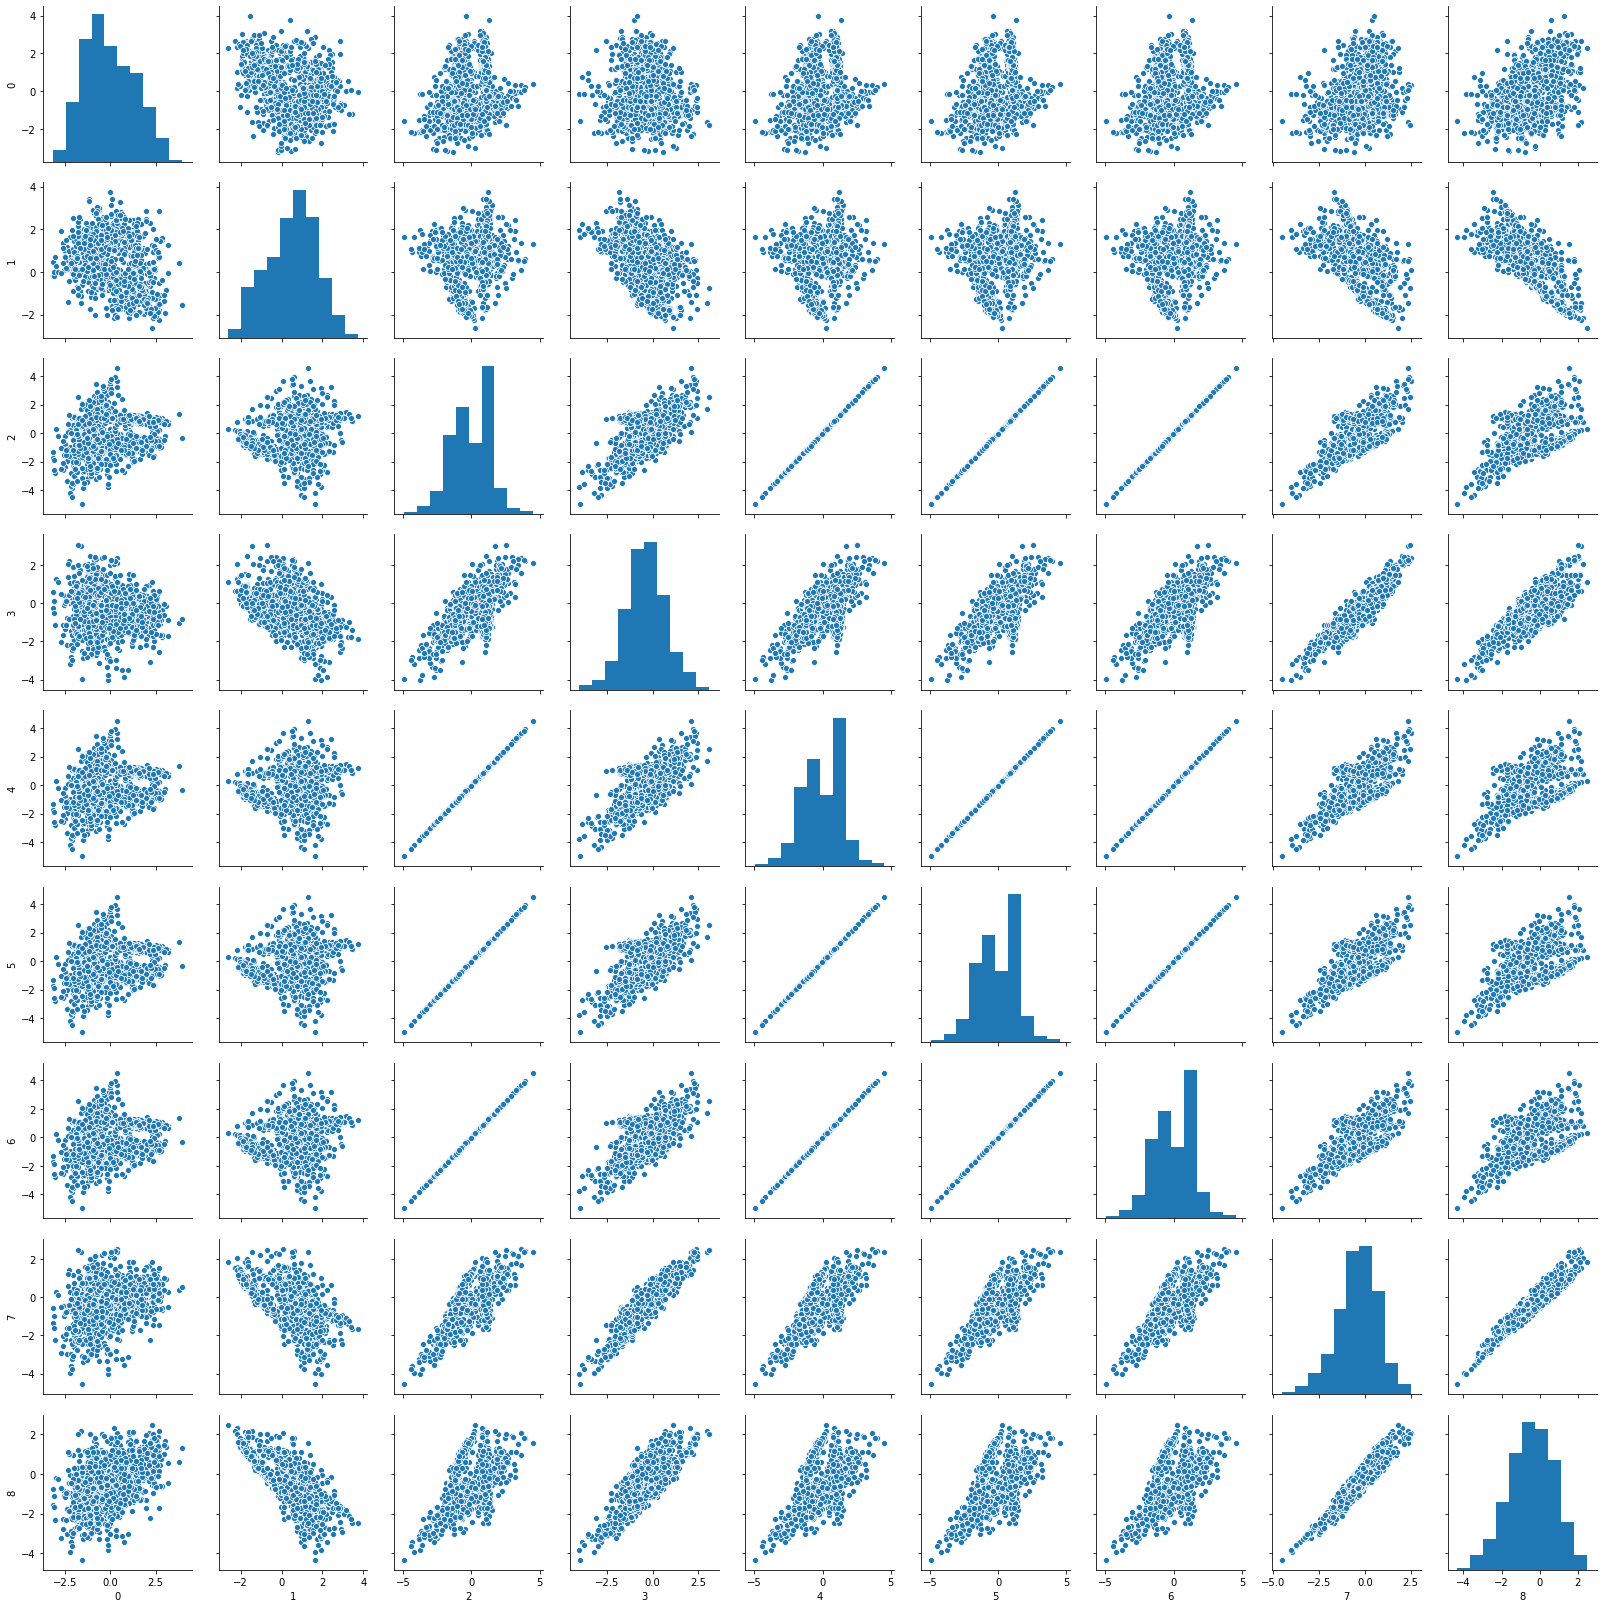

In [41]:
# generate 2 class dataset
# X contains the object data and y the object classification (0 or 1)
X, y = make_classification(n_samples=1000, \
                           n_classes=2, class_sep=2., \
                           n_features=3,\
                           n_informative=3, n_redundant=0,\
                           n_repeated=0, random_state=1)

# Create a pairplot
df = pd.DataFrame(X)
sns.pairplot(df)
p= plt.show()

Now split sample into train and test subsets. You can play with the train-test percentage split (`test_size`, initially 40%). 

Plot two parameters for train and test to visualize the split.

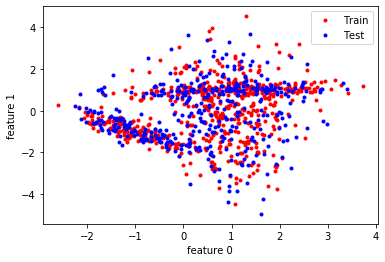

In [38]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.4, random_state=2)

plt.plot(trainX[:,0],trainX[:,1],"r.",label="Train")
plt.plot(testX[:,0],testX[:,1],"b.",label="Test")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend()
p= plt.show()

Now use classifiers:

* First, we generate a "no skill" prediction. All the objects are assigned probability zero to the first class (all assigned to the second class)
* Next we use a logistic regression and we get the classification probabilities

We use the first set of probabilities: _probability of the object being of class 0_. Then we plot the histograms of probabilites for the test sample objects with class 0 and objects of class 1. Notice the piling up at zero or 1 depending on the class.

For a sample with only two classes, as the one we use, the two sets of probabilities given by `predict_proba` are complementary (P0+P1=1). For samples with more classes you can do the histograms and plot the ROC curves for the predicted probabilities for each class.

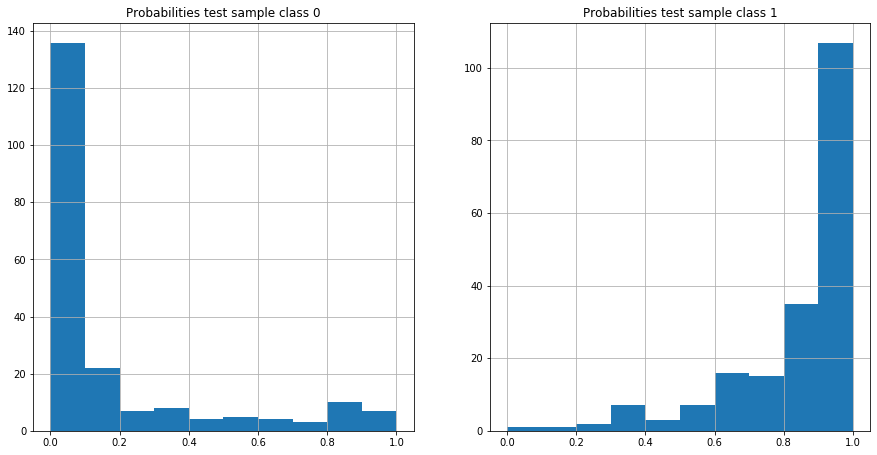

In [39]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities and keep probabilities 
# for the first class only
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]

# Separate probabilities for each class of objects
prob_class_0= [P for P,obj_class in zip(lr_probs,testy) if obj_class==0]
prob_class_1= [P for P,obj_class in zip(lr_probs,testy) if obj_class==1]

fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)
plt.xlabel("P")
plt.ylabel("N")

plt.subplot(1,2,1)
plt.hist(prob_class_0, range=(0,1))
plt.grid(True)
plt.title("Probabilities test sample class 0")

plt.subplot(1,2,2)
plt.hist(prob_class_1, range=(0,1))
plt.grid(True)
plt.title("Probabilities test sample class 1")

p= plt.show()

Now plot the ROC and print the AUC. You can relate the shape of the ROC with the above histograms.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946


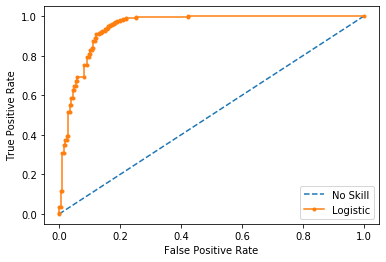

In [42]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()